In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('data.csv')
data.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1


In [4]:
data.shape

(8518, 8)

In [5]:
data.columns

Index(['Reviewer Name', 'Review Title', 'Place of Review', 'Up Votes',
       'Down Votes', 'Month', 'Review text', 'Ratings'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8518 entries, 0 to 8517
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviewer Name    8508 non-null   object 
 1   Review Title     8508 non-null   object 
 2   Place of Review  8468 non-null   object 
 3   Up Votes         8508 non-null   float64
 4   Down Votes       8508 non-null   float64
 5   Month            8053 non-null   object 
 6   Review text      8510 non-null   object 
 7   Ratings          8518 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 532.5+ KB


In [7]:
data.isna().sum()

Reviewer Name       10
Review Title        10
Place of Review     50
Up Votes            10
Down Votes          10
Month              465
Review text          8
Ratings              0
dtype: int64

In [8]:
data.duplicated().sum()

np.int64(4)

In [9]:
data.drop_duplicates(inplace=True)

In [10]:
data['Reviewer Name'] = data['Reviewer Name'].fillna('Unknown')
data['Review Title'] = data['Review Title'].fillna('No Title')
data['Place of Review'] = data['Place of Review'].fillna('Not Mentioned')
data['Up Votes'] = data['Up Votes'].fillna(0)
data['Down Votes'] = data['Down Votes'].fillna(0)
data['Review text'] = data['Review text'].fillna('No Review') 

In [11]:
data['Up Votes'] = data['Up Votes'].astype(int)
data['Down Votes'] = data['Down Votes'].astype(int)

In [12]:
### here we dont need month column because it has more nans

In [13]:
data = data.drop(columns=['Month'])

In [15]:
data.describe()

,Up Votes,Down Votes,Ratings
count,8514.000000,8514.000000,8514.000000
mean,0.391121,0.121682,4.182053
std,11.609820,3.246879,1.261331
min,0.000000,0.000000,1.000000
25%,0.000000,0.000000,4.000000
50%,0.000000,0.000000,5.000000
75%,0.000000,0.000000,5.000000
max,889.000000,219.000000,5.000000


In [18]:
data['Ratings'].unique()

array([4, 1, 3, 5, 2])

In [24]:
data['Ratings'].value_counts()


Ratings
5    5080
4    1745
1     767
3     615
2     307
Name: count, dtype: int64

In [19]:
satisfied = data[data['Ratings'] >= 4]
dissatisfied = data[data['Ratings'] <= 2]


In [21]:
satisfied[['Up Votes', 'Down Votes']].mean()
dissatisfied[['Up Votes', 'Down Votes']].mean()


Up Votes      0.641527
Down Votes    0.223464
dtype: float64

In [23]:
data.groupby('Place of Review')['Ratings'].mean().sort_values(ascending=False)

Place of Review
Certified Buyer, Wayanad                    5.0
Certified Buyer, Washim District            5.0
Certified Buyer, Warangal Rural District    5.0
Certified Buyer, Warangal District          5.0
Certified Buyer, Wanaparthy District        5.0
                                           ... 
Certified Buyer, Ramgarh                    1.0
Certified Buyer, Razole                     1.0
Certified Buyer, Rayachoti                  1.0
Certified Buyer, Kannad                     1.0
Certified Buyer, Vissannapet                1.0
Name: Ratings, Length: 2338, dtype: float64

<Axes: >

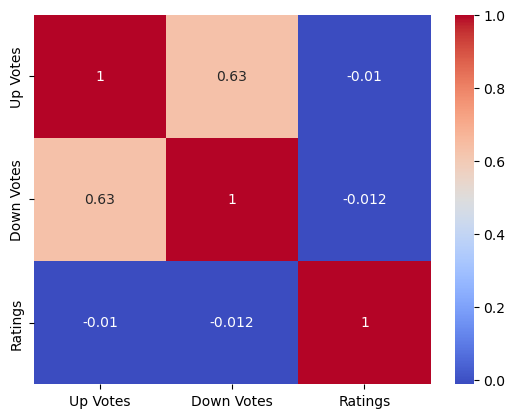

In [33]:
sns.heatmap(data=data.corr(numeric_only=True),annot=True,cmap='coolwarm')

In [34]:
data.groupby('Ratings')['Up Votes'].mean()


Ratings
1    0.792699
2    0.263844
3    0.084553
4    0.679656
5    0.276181
Name: Up Votes, dtype: float64

In [35]:
data.groupby('Ratings')['Down Votes'].mean()


Ratings
1    0.273794
2    0.097720
3    0.022764
4    0.186246
5    0.089961
Name: Down Votes, dtype: float64

In [36]:
### Text Cleaning

In [37]:
# converting text in to lowercase
data['clean_review'] = data['Review text'].str.lower()

In [40]:
# removing special char and punctuations
import re

data['clean_review'] = data['clean_review'].apply(
    lambda x: re.sub(r'[^a-z\s]', '', x)
)


In [41]:
# removing white spaces
data['clean_review'] = data['clean_review'].str.strip()
data['clean_review'] = data['clean_review'].str.replace(r'\s+', ' ', regex=True)

In [46]:
import nltk
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
nltk.download('omw-1.4')  
lemmatizer = WordNetLemmatizer()

data['clean_review'] = data['clean_review'].apply(
    lambda x: ' '.join(lemmatizer.lemmatize(word) for word in x.split())
)



[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mothe\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\mothe\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [47]:
data['clean_review'].head()

0    nice product good quality but price is now ris...
1    they didnt supplied yonex mavis outside cover ...
2    worst product damaged shuttlecock packed in ne...
3    quite o k but nowadays the quality of the cork...
4    over pricedjust from retaileri didnt understan...
Name: clean_review, dtype: object

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=3000)
X_tfidf = tfidf.fit_transform(data['clean_review'])


In [53]:
tfidf_df = pd.DataFrame(
    X_tfidf.toarray(),
    columns=tfidf.get_feature_names_out()
)

tfidf_df.head()

,aajao,aapke,able,about,aboutread,above,absolute,absolutely,acceptable,acceptableread,...,yonexsatisfiedread,yonexxx,yonox,yoread,you,youplz,your,youread,youtube,yr
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.197518,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [55]:
data['Ratings'].value_counts()

Ratings
5    5080
4    1745
1     767
3     615
2     307
Name: count, dtype: int64

In [56]:
# my rating data is imbalance so i have to balance it

In [57]:
def rating_to_class(r):
    if r <= 2:
        return 0   # Negative
    elif r == 3:
        return 1   # Neutral
    else:
        return 2   # Positive

data['sentiment'] = data['Ratings'].apply(rating_to_class)
y = data['sentiment']

In [58]:
### Segregating Features and target

In [59]:
X = X_tfidf          
y = data['sentiment']

In [62]:
### split the data into train test split

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [64]:
### choosing a model(logistic regression)--> it best fit with tf-idf

In [65]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    max_iter=1000,
    class_weight='balanced'
)


In [66]:
### training the model

In [67]:
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [69]:
y_pred = model.predict(X_test)

In [72]:
print(f'Train_Score:{model.score(X_train, y_train)}')

Train_Score:0.8771105564527969


In [73]:
### Evaluating the model 

In [74]:
from sklearn.metrics import accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8256018790369936


In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs'],
    'class_weight': ['balanced']
}


In [76]:
lr = LogisticRegression(max_iter=1000)

grid_lr = GridSearchCV(
    lr,
    param_grid_lr,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1
)

grid_lr.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'class_weight': ['balanced'],
                         'penalty': ['l2'], 'solver': ['lbfgs']},
             scoring='f1_macro')

In [77]:
print("Best parameters:", grid_lr.best_params_)
print("Best CV score:", grid_lr.best_score_)


Best parameters: {'C': 1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'lbfgs'}
Best CV score: 0.6204048869678728


In [78]:
best_lr = grid_lr.best_estimator_

y_pred_lr = best_lr.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_lr))


              precision    recall  f1-score   support

           0       0.63      0.73      0.68       215
           1       0.21      0.30      0.25       123
           2       0.95      0.89      0.92      1365

    accuracy                           0.83      1703
   macro avg       0.60      0.64      0.61      1703
weighted avg       0.85      0.83      0.84      1703



In [80]:
print(f'Train_Score:{model.score(X_train, y_train)}')
print("Accuracy:", accuracy_score(y_test, y_pred))

Train_Score:0.8771105564527969
Accuracy: 0.8256018790369936


In [82]:
from sklearn.svm import LinearSVC

param_grid_svm = {
    'C': [0.01, 0.1, 1, 10]
}

svm = LinearSVC(class_weight='balanced')

grid_svm = GridSearchCV(
    svm,
    param_grid_svm,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1
)

grid_svm.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=LinearSVC(class_weight='balanced'), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10]}, scoring='f1_macro')

In [86]:
best_svm = grid_svm.best_estimator_
y_pred_svm = best_svm.predict(X_test)

print(classification_report(y_test, y_pred_svm))


              precision    recall  f1-score   support

           0       0.71      0.74      0.73       215
           1       0.33      0.22      0.26       123
           2       0.93      0.95      0.94      1365

    accuracy                           0.87      1703
   macro avg       0.65      0.64      0.64      1703
weighted avg       0.86      0.87      0.86      1703



In [83]:
print(f'Train_Score:{model.score(X_train, y_train)}')
print("Accuracy:", accuracy_score(y_test, y_pred))

Train_Score:0.8771105564527969
Accuracy: 0.8256018790369936


In [88]:
y_pred_lr = best_lr.predict(X_test)
y_pred_svm = best_svm.predict(X_test)


In [89]:
from sklearn.metrics import accuracy_score, f1_score

metrics = {
    "Logistic Regression": {
        "Accuracy": accuracy_score(y_test, y_pred_lr),
        "F1_macro": f1_score(y_test, y_pred_lr, average='macro')
    },
    "Linear SVM": {
        "Accuracy": accuracy_score(y_test, y_pred_svm),
        "F1_macro": f1_score(y_test, y_pred_svm, average='macro')
    }
}

metrics


{'Logistic Regression': {'Accuracy': 0.8256018790369936,
  'F1_macro': 0.6144812558470895},
 'Linear SVM': {'Accuracy': 0.8714034057545508,
  'F1_macro': 0.6426517427282041}}

In [90]:
import pandas as pd

comparison_df = pd.DataFrame(metrics).T
comparison_df.sort_values(by="F1_macro", ascending=False)


,Accuracy,F1_macro
Linear SVM,0.871403,0.642652
Logistic Regression,0.825602,0.614481


In [91]:
from sklearn.metrics import classification_report

print("Logistic Regression Report")
print(classification_report(y_test, y_pred_lr))

print("Linear SVM Report")
print(classification_report(y_test, y_pred_svm))


Logistic Regression Report
              precision    recall  f1-score   support

           0       0.63      0.73      0.68       215
           1       0.21      0.30      0.25       123
           2       0.95      0.89      0.92      1365

    accuracy                           0.83      1703
   macro avg       0.60      0.64      0.61      1703
weighted avg       0.85      0.83      0.84      1703

Linear SVM Report
              precision    recall  f1-score   support

           0       0.71      0.74      0.73       215
           1       0.33      0.22      0.26       123
           2       0.93      0.95      0.94      1365

    accuracy                           0.87      1703
   macro avg       0.65      0.64      0.64      1703
weighted avg       0.86      0.87      0.86      1703



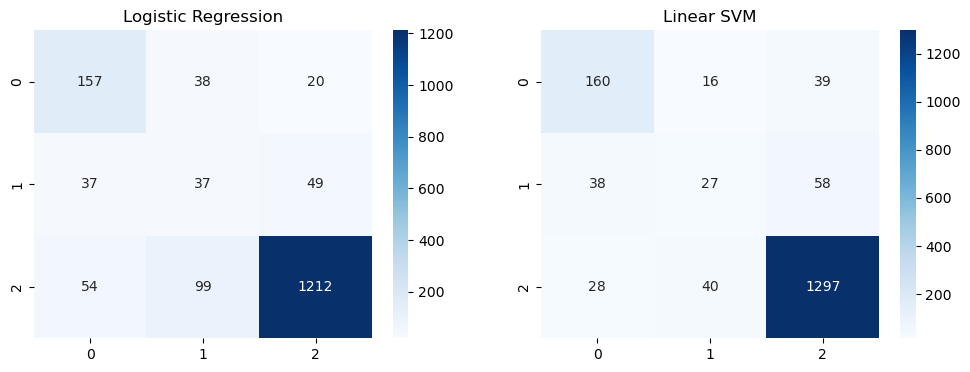

In [92]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_svm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression")

plt.subplot(1,2,2)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title("Linear SVM")

plt.show()


## Final

After hyperparameter tuning and evaluation, Linear SVM outperformed Logistic Regression with a higher F1-macro score and better balanced performance across sentiment classes. Since the dataset is imbalanced, F1-macro was prioritized over accuracy, leading to the selection of Linear SVM as the final model.

In [93]:
import joblib

joblib.dump(best_svm, "sentiment_model.pkl")
joblib.dump(tfidf, "tfidf_vectorizer.pkl")


['tfidf_vectorizer.pkl']